In [1]:
%matplotlib inline
ROOT_EXAMPLE_FILE = "public_train_10000.root"

/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Read the data
* Here we repeat the exact same code as in root_numpy tutorial

In [2]:
import root_numpy
root2array_example = root_numpy.root2array(ROOT_EXAMPLE_FILE)

# Explore the dataset
* We create a Pandas dataframe from the loaded data
* DataFrames are have much in common with numpy arrays

In [3]:
import pandas as pd
df = pd.DataFrame(root2array_example)

In [4]:
#table shape
print "len(data) = ",len(df)
print "data.shape = ",df.shape

len(data) =  10000
data.shape =  (10000, 30)


In [5]:
print df.columns

Index([u'event_id', u'target', u'lepton_pt', u'lepton_eta', u'lepton_phi',
       u'mem_pt', u'mem_phi', u'jet1_pt', u'jet1_eta', u'jet1_phi',
       u'jet1_btag', u'jet2_pt', u'jet2_eta', u'jet2_phi', u'jet2_btag',
       u'jet3_pt', u'jet3_eta', u'jet3_phi', u'jet3_btag', u'jet4_pt',
       u'jet4_eta', u'jet4_phi', u'jet4_btag', u'm_jj', u'm_jjj', u'm_lv',
       u'm_jlv', u'm_bb', u'm_wbb', u'm_wwbb'],
      dtype='object')


### indexing rows
* Pandas works a lot like numpy array in terms of indexing, with only 2 exceptions
 * It supports indexing by column names
 * Selecting a single element is done via df.irow(2) and not just df[2]

In [6]:
#several rows
print "Rows 0~4"
df[0:5]

Rows 0~4


,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1000001,1,34.750568,0.787025,1.898891,20.862434,-2.622998,44.814148,-0.168171,2.631595,...,0.877472,-0.256736,0.000000,81.724449,189.583145,80.118317,170.086075,91.128204,298.468781,374.685760
1,1000002,1,54.250927,-1.057915,2.310697,51.167873,2.545749,31.039040,-2.220276,-0.737298,...,-1.139118,-1.300325,2.000016,65.837746,201.096756,83.321556,208.039688,67.118484,287.363983,527.247559
2,1000003,1,47.746025,-0.783184,2.660325,68.165527,-1.700790,36.945312,-1.151738,-0.626912,...,-0.798898,-1.605550,2.000016,69.316925,156.334732,95.307602,149.089005,130.389206,237.879318,336.058838
3,1000004,0,45.950066,1.613817,0.964722,39.302082,-0.075989,84.307426,0.465748,2.287783,...,-0.586711,-2.256246,2.000023,71.032066,182.341537,81.941925,164.411148,93.709511,237.900055,392.807831
4,1000005,0,44.409187,-0.228907,-1.837974,49.886654,0.156533,32.852112,2.561646,2.641460,...,0.293522,1.391425,0.000000,122.030174,288.594086,84.386459,150.299744,69.818291,435.990356,533.977905


In [7]:
#single row
print "4-th row = ", df.irow(4)

4-th row =  event_id      1000005.000000
target              0.000000
lepton_pt          44.409187
lepton_eta         -0.228907
lepton_phi         -1.837974
mem_pt             49.886654
mem_phi             0.156533
jet1_pt            32.852112
jet1_eta            2.561646
jet1_phi            2.641460
jet1_btag           0.000000
jet2_pt            46.283184
jet2_eta           -1.488267
jet2_phi           -2.524357
jet2_btag           2.000000
jet3_pt            29.664640
jet3_eta           -0.031725
jet3_phi           -1.192486
jet3_btag           0.000000
jet4_pt           138.741928
jet4_eta            0.293522
jet4_phi            1.391425
jet4_btag           0.000000
m_jj              122.030174
m_jjj             288.594086
m_lv               84.386459
m_jlv             150.299744
m_bb               69.818291
m_wbb             435.990356
m_wwbb            533.977905
Name: 4, dtype: float32


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  from ipykernel import kernelapp as app


### indexing columns

In [ ]:
#single column
print df["lepton_eta"]
#same as
#print df.lepton_eta

In [ ]:
#multiple columns and rows
df[["lepton_eta","lepton_phi"]][5:10]

### boolean indexing

In [ ]:
df[df.target == 1]

In [ ]:
df[df.lepton_pt > 250]

Any numpy operations are still valid

In [9]:
import numpy as np
#whatever this means
np.mean( np.sin(df["lepton_eta"]) / np.cos(df["lepton_phi"]) )

0.30526188

### pandas features

In [10]:
#measure some common statistical properties
df[df.columns[:7]].describe()

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1005000.50000,0.528500,54.335014,-0.007869,0.011635,57.858730,0.004965
std,2886.89568,0.499212,31.041136,1.042986,1.815629,35.152618,1.800542
min,1000001.00000,0.000000,14.480052,-2.536421,-3.141440,0.303264,-3.140285
25%,1002500.75000,0.000000,32.077293,-0.781196,-1.544907,33.281473,-1.544406
50%,1005000.50000,1.000000,46.749529,-0.006452,0.002232,51.195229,0.010495
75%,1007500.25000,1.000000,68.082933,0.768788,1.587958,74.835726,1.554732
max,1010000.00000,1.000000,368.898407,2.515544,3.141535,415.867371,3.140140


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


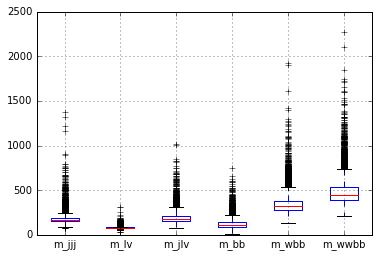

In [11]:
# Plot the "Box with whiskers" plot
# red dash is mean, box is mean +- sigma
# black dashes are 2 sigmas, '+' are dots outside 2*sigma range
df[df.columns[24:]].boxplot();

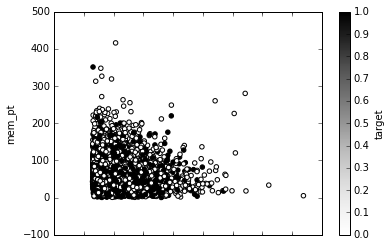

In [12]:
df.plot.scatter('lepton_pt','mem_pt', c = 'target')

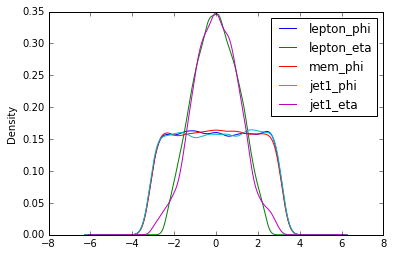

In [13]:
df[['lepton_phi','lepton_eta','mem_phi','jet1_phi','jet1_eta']].plot.density()

# Your turn
* Select two dataframes - one with target equals 1 and the other with target = 0
* Use .describe to find whether mem_pt is larger for signal or background

In [ ]:
df_1 = <dataframe with signal (where target is 1)
df_0 = <dataframe with background>

In [ ]:
#describe signal
<your code>

In [ ]:
#describe background
<your code>

In [ ]:
#Plot density over mem_pt for signal and background (2 lines on a single plot)
#To do that, call both functions within 1 tab

<your code>